# Data Project - Stock Market Analysis 


In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
    


# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'ZM', 'WORK']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [3]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN, ZM, WORK]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "ZOOM", "SLACK"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-07-09,91.269997,89.099998,90.269997,90.930000,1557400.0,90.930000,ZOOM
2020-02-11,1529.630005,1505.637939,1511.810059,1508.790039,1344600.0,1508.790039,GOOGLE
2019-05-24,182.139999,178.619995,180.199997,178.970001,23714700.0,177.338043,APPLE
2020-01-28,1456.000000,1432.469971,1443.000000,1452.560059,1577400.0,1452.560059,GOOGLE
2019-12-02,268.250000,263.450012,267.269989,264.160004,23621800.0,263.534546,APPLE
2019-07-11,1153.069946,1139.579956,1143.250000,1144.209961,1195500.0,1144.209961,GOOGLE
2020-01-17,167.470001,165.429993,167.419998,167.100006,34371700.0,166.644836,MICROSOFT
2019-06-25,36.139999,34.810001,35.189999,35.200001,10116600.0,35.200001,SLACK
2020-01-10,163.220001,161.179993,162.820007,161.339996,20725900.0,160.900513,MICROSOFT


In [5]:
# Summary Stats
ZM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,92.885748,87.447362,90.112008,90.198622,5.184131e+06,90.198622
std,25.069508,21.908698,23.473738,23.408622,6.341784e+06,23.408622
min,63.740002,60.967999,61.330002,62.000000,5.126000e+05,62.000000
25%,74.575001,71.165751,73.085001,72.895000,1.596850e+06,72.895000
50%,88.365002,83.259998,85.324997,85.079998,2.471500e+06,85.079998
75%,101.424999,94.933249,97.912498,97.320000,5.207275e+06,97.320000
max,181.500000,158.300003,177.149994,169.089996,4.404950e+07,169.089996


In [6]:
# General info
ZM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-04-30 to 2020-04-30
Data columns (total 7 columns):
High            254 non-null float64
Low             254 non-null float64
Open            254 non-null float64
Close           254 non-null float64
Volume          254 non-null int64
Adj Close       254 non-null float64
company_name    254 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


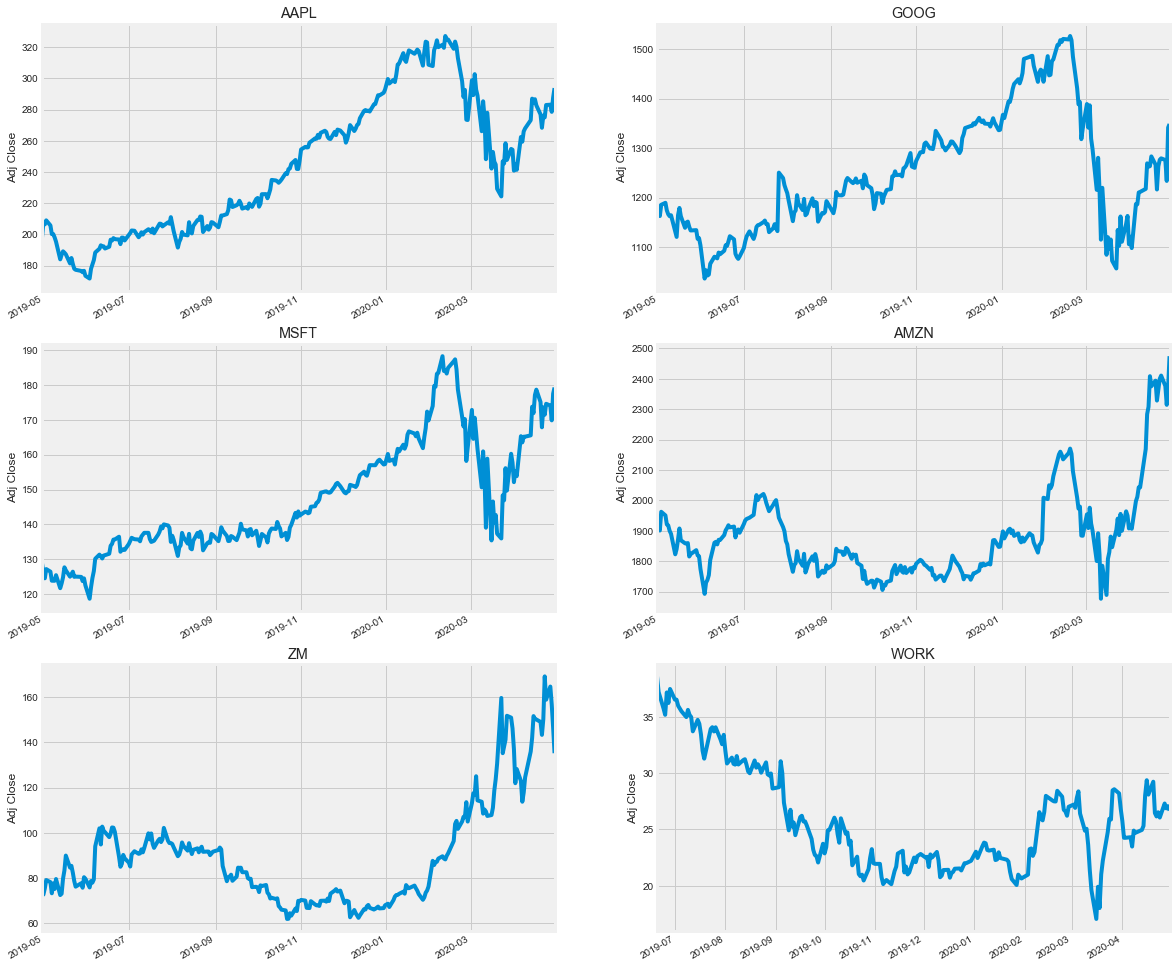

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

#### We can see only Zoom and Amazon stock prices are increasing significantly. However, each of them increase in their own way, they are not strongly correlative. 

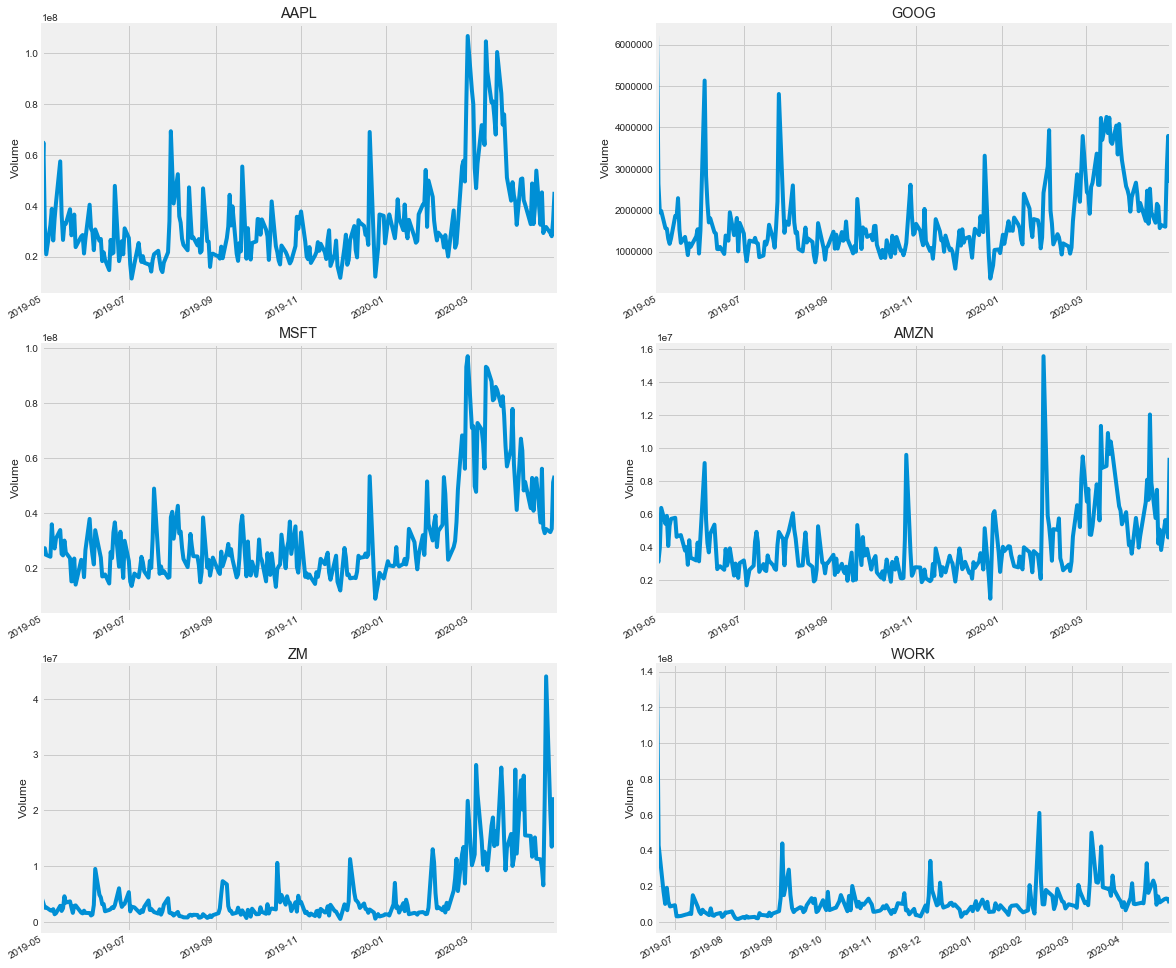

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [10]:
print(ZM.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

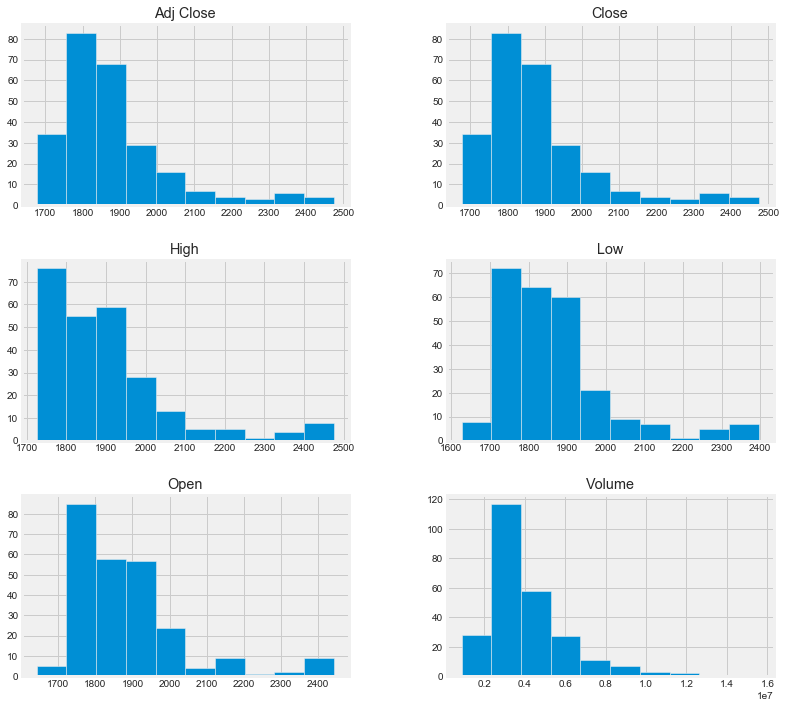

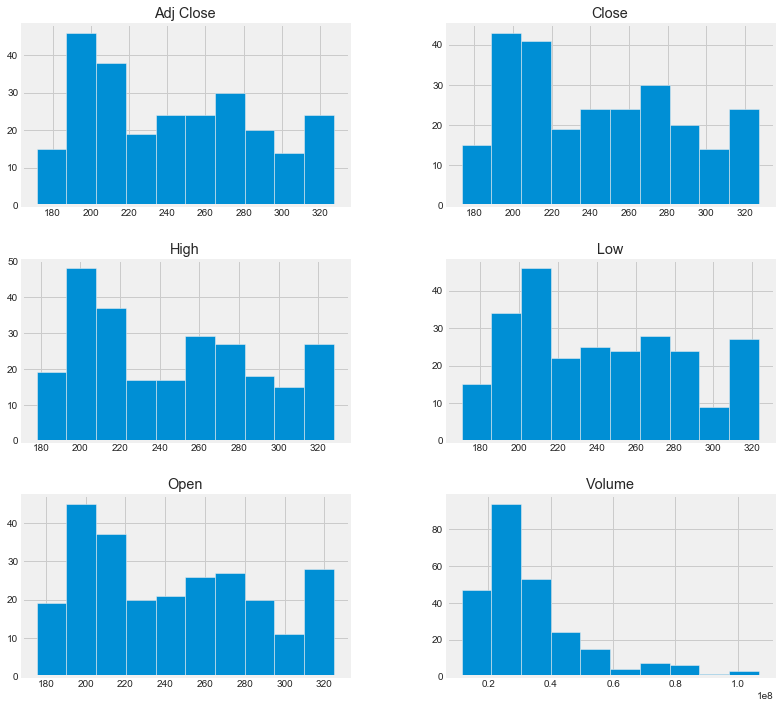

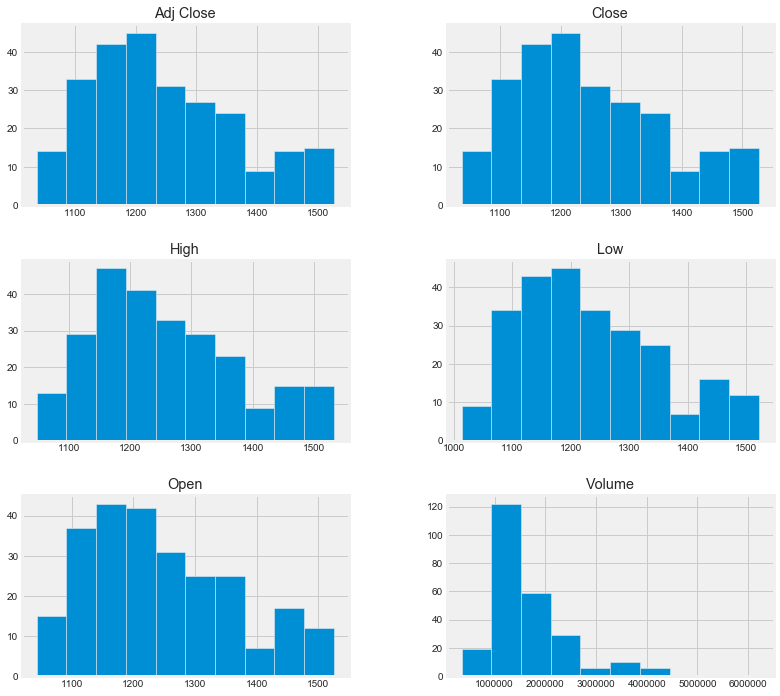

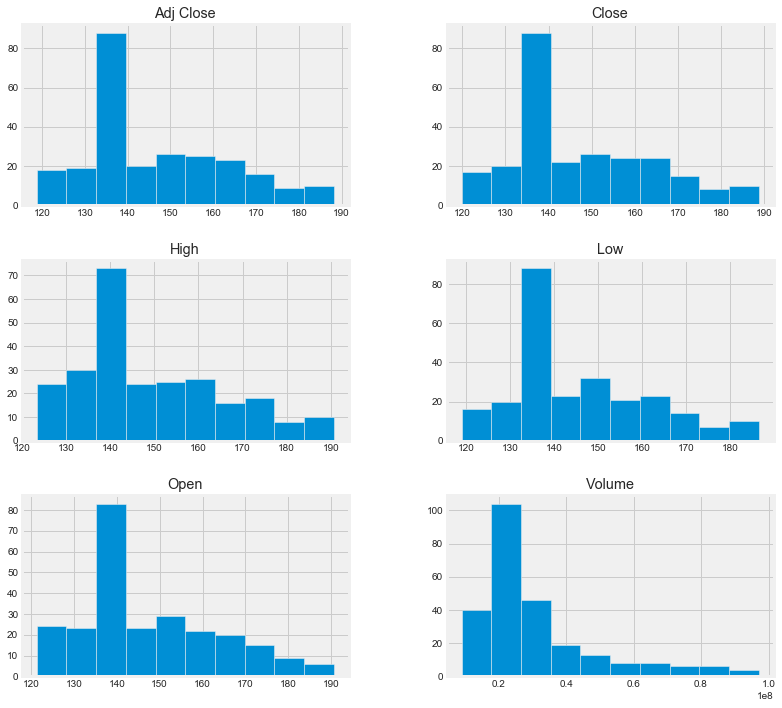

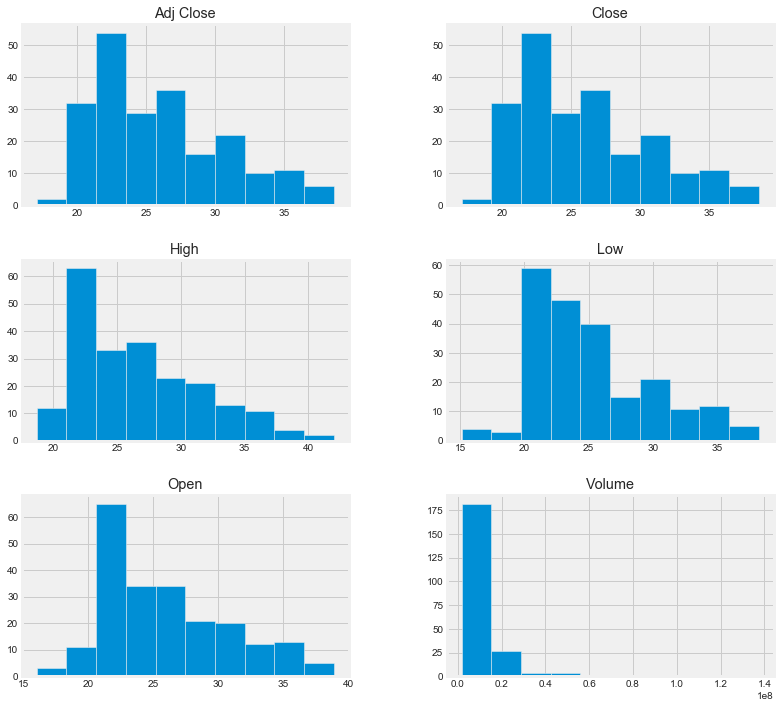

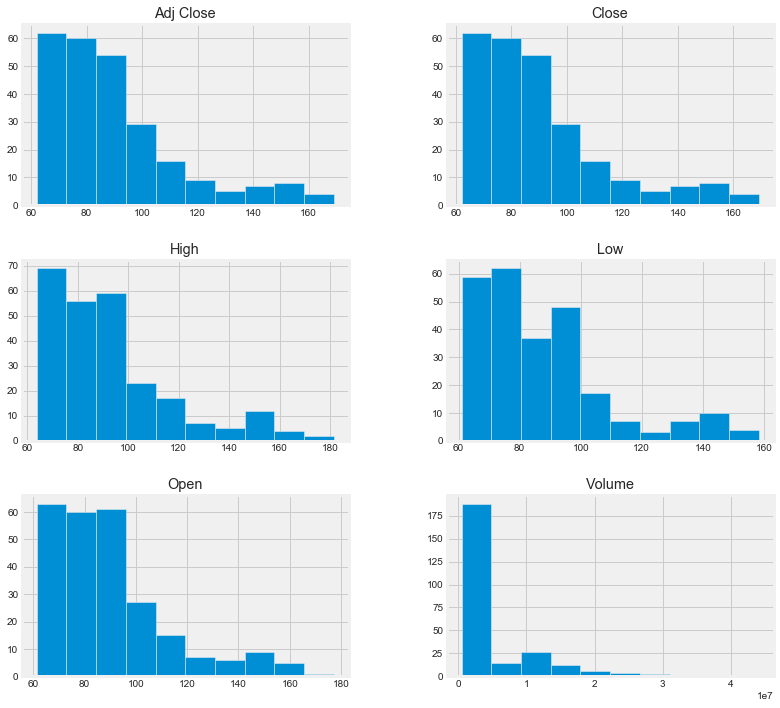

In [11]:
df.groupby("company_name").hist(figsize=(12, 12));

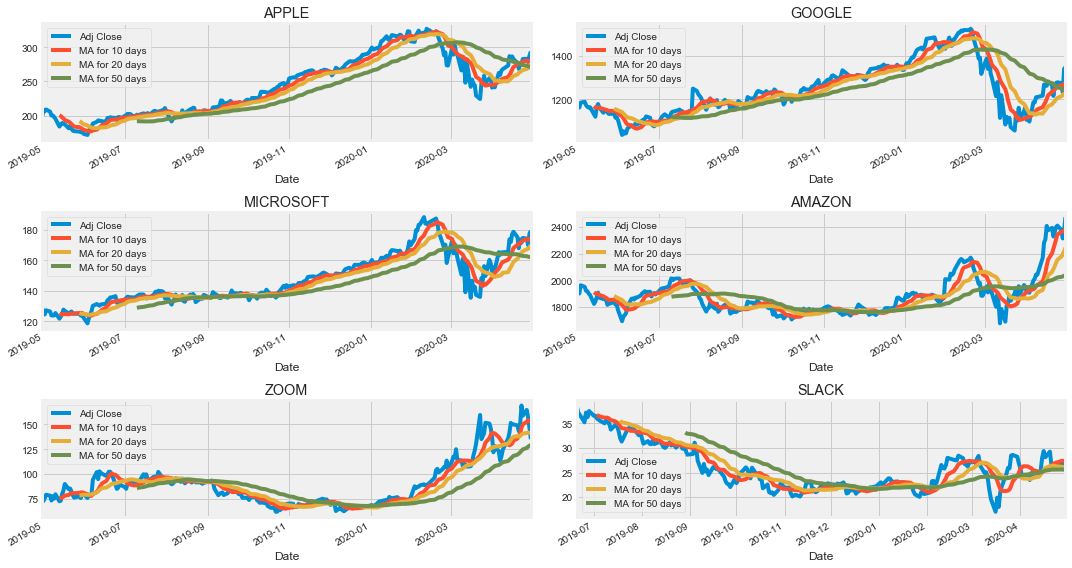

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

ZM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('ZOOM')

WORK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('SLACK')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

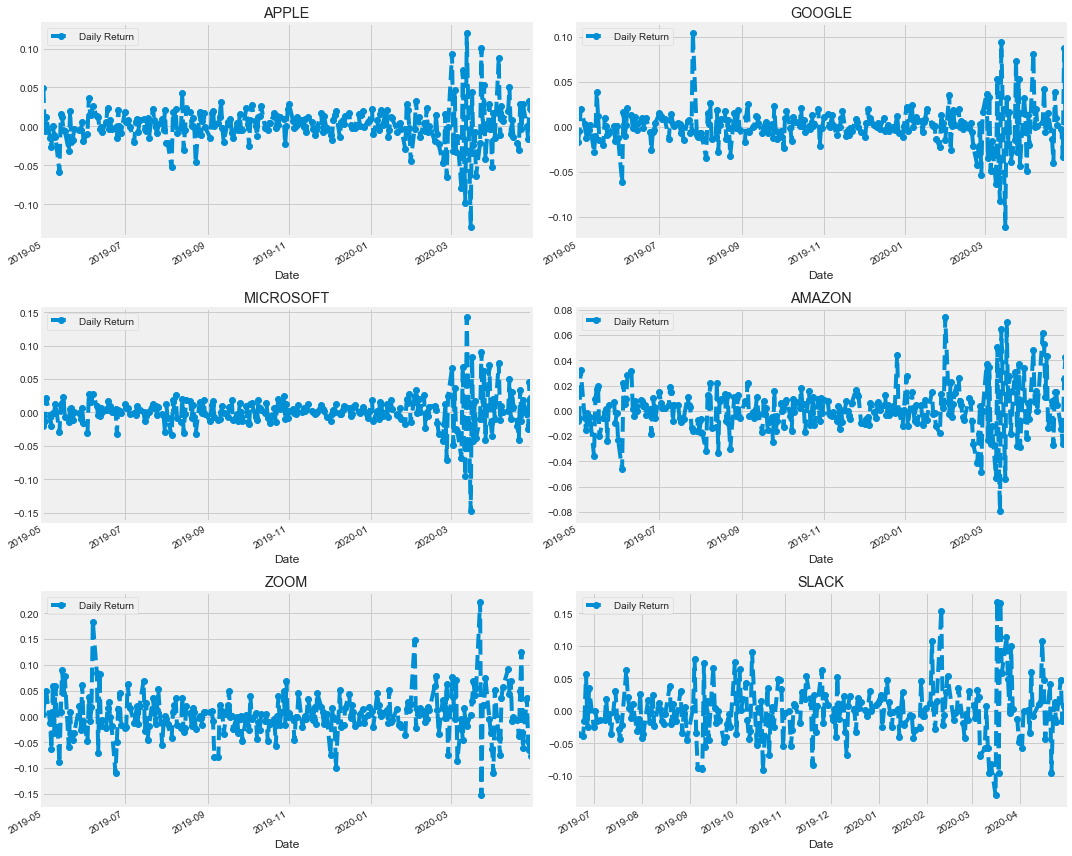

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

ZM['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('ZOOM')

WORK['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('SLACK')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

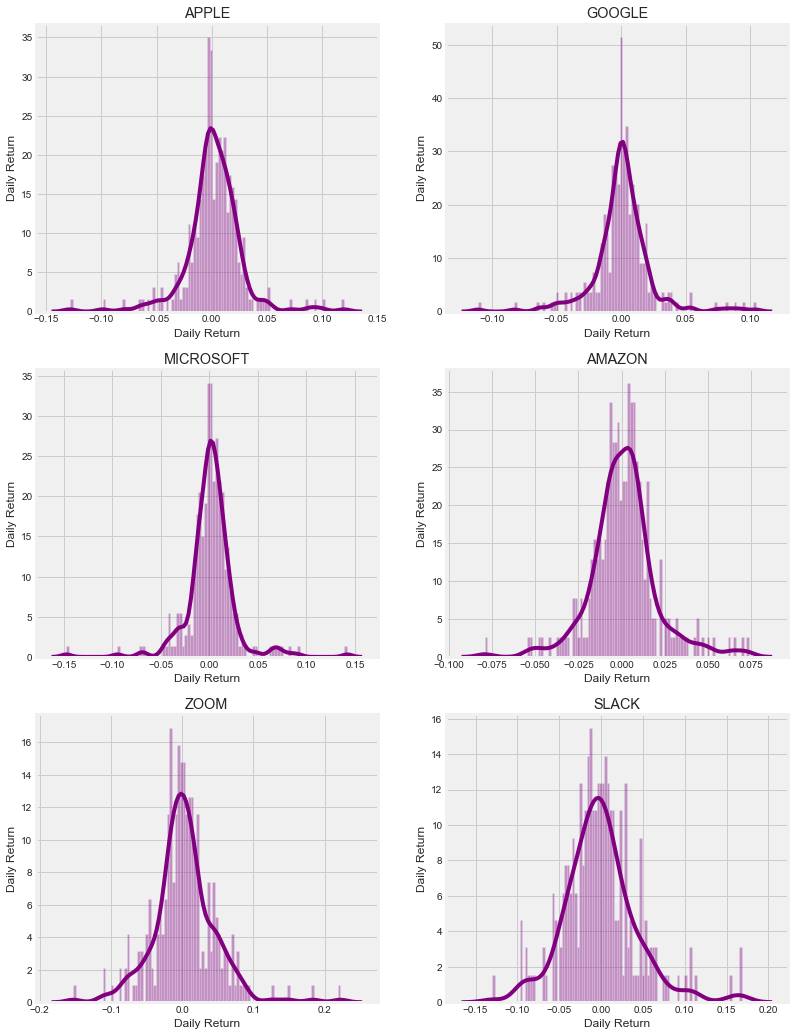

In [14]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 18))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN,ZM,WORK
Date,,,,,,
2019-04-30,198.077362,1188.479980,128.894653,1926.520020,72.470001,NaN
2019-05-01,207.800110,1168.079956,126.210159,1911.520020,72.760002,NaN
2019-05-02,206.447800,1162.609985,124.561966,1900.819946,75.500000,NaN
2019-05-03,209.014221,1185.400024,127.216843,1962.459961,79.180000,NaN
2019-05-06,205.786469,1189.390015,126.476624,1950.550049,78.239998,NaN


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,ZM,WORK
Date,,,,,,
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01,0.049086,-0.017165,-0.020827,-0.007786,0.004002,NaN
2019-05-02,-0.006508,-0.004683,-0.013059,-0.005598,0.037658,NaN
2019-05-03,0.012431,0.019602,0.021314,0.032428,0.048742,NaN
2019-05-06,-0.015443,0.003366,-0.005819,-0.006069,-0.011872,NaN


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

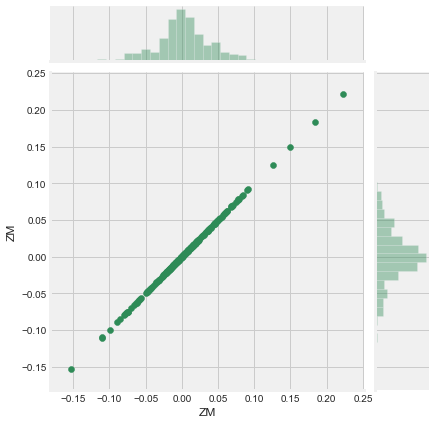

In [17]:
# Comparing Zoom to itself should show a perfectly linear relationship
sns.jointplot('ZM', 'ZM', tech_rets, kind='scatter', color='seagreen');

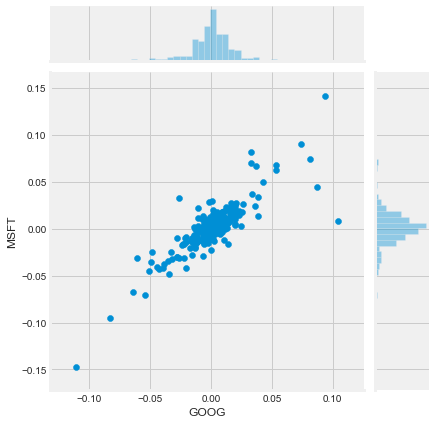

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter');

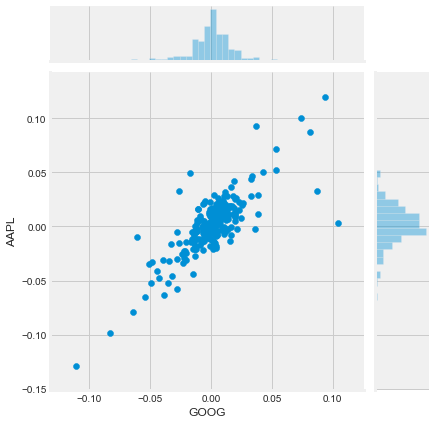

In [19]:
# We'll use joinplot to compare the daily returns of Google and Apple
sns.jointplot('GOOG', 'AAPL', tech_rets, kind='scatter');

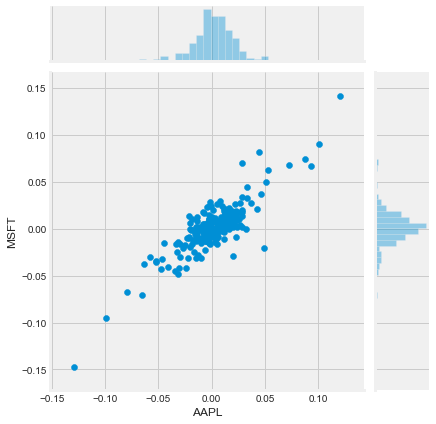

In [20]:
# We'll use joinplot to compare the daily returns of Apple and Microsoft
sns.jointplot('AAPL', 'MSFT', tech_rets, kind='scatter');

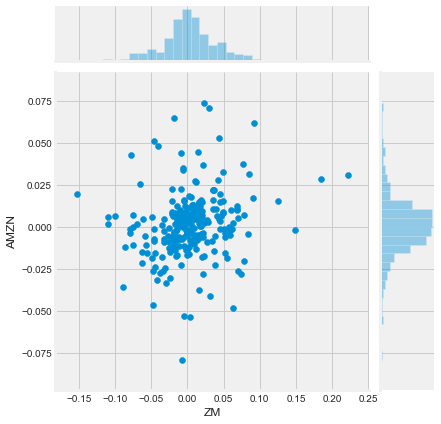

In [21]:
# We'll use joinplot to compare the daily returns of Zoom and Amazon
sns.jointplot('ZM', 'AMZN', tech_rets, kind='scatter');

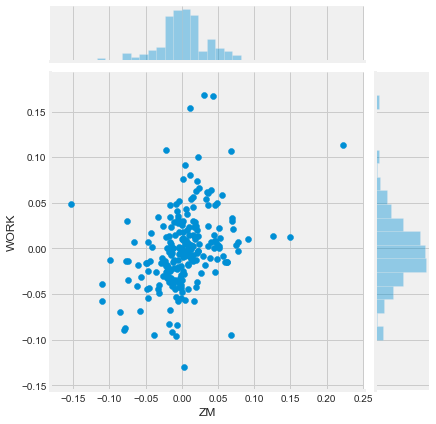

In [22]:
# We'll use joinplot to compare the daily returns of Zoom and Work
sns.jointplot('ZM', 'WORK', tech_rets, kind='scatter');

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

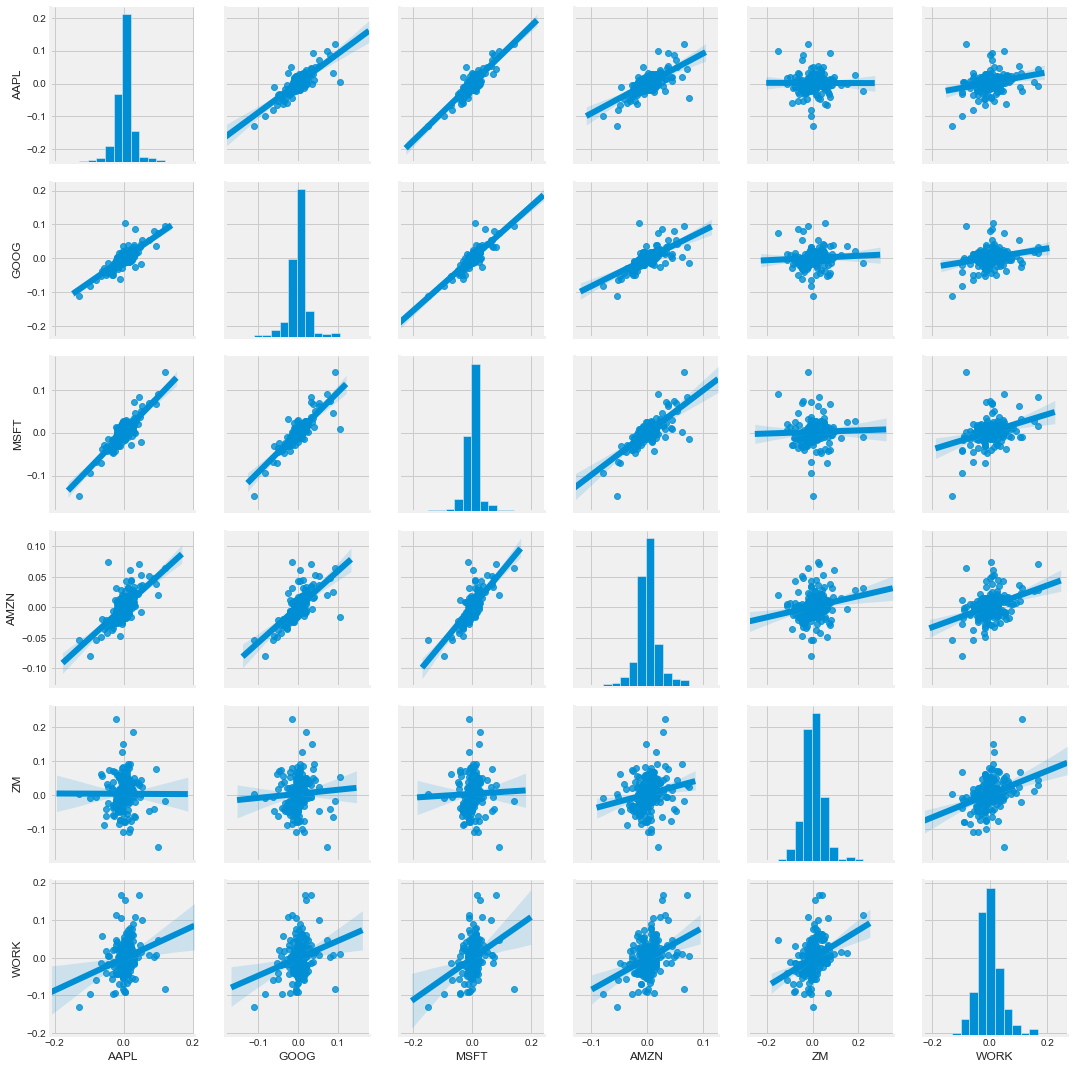

In [23]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg');

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

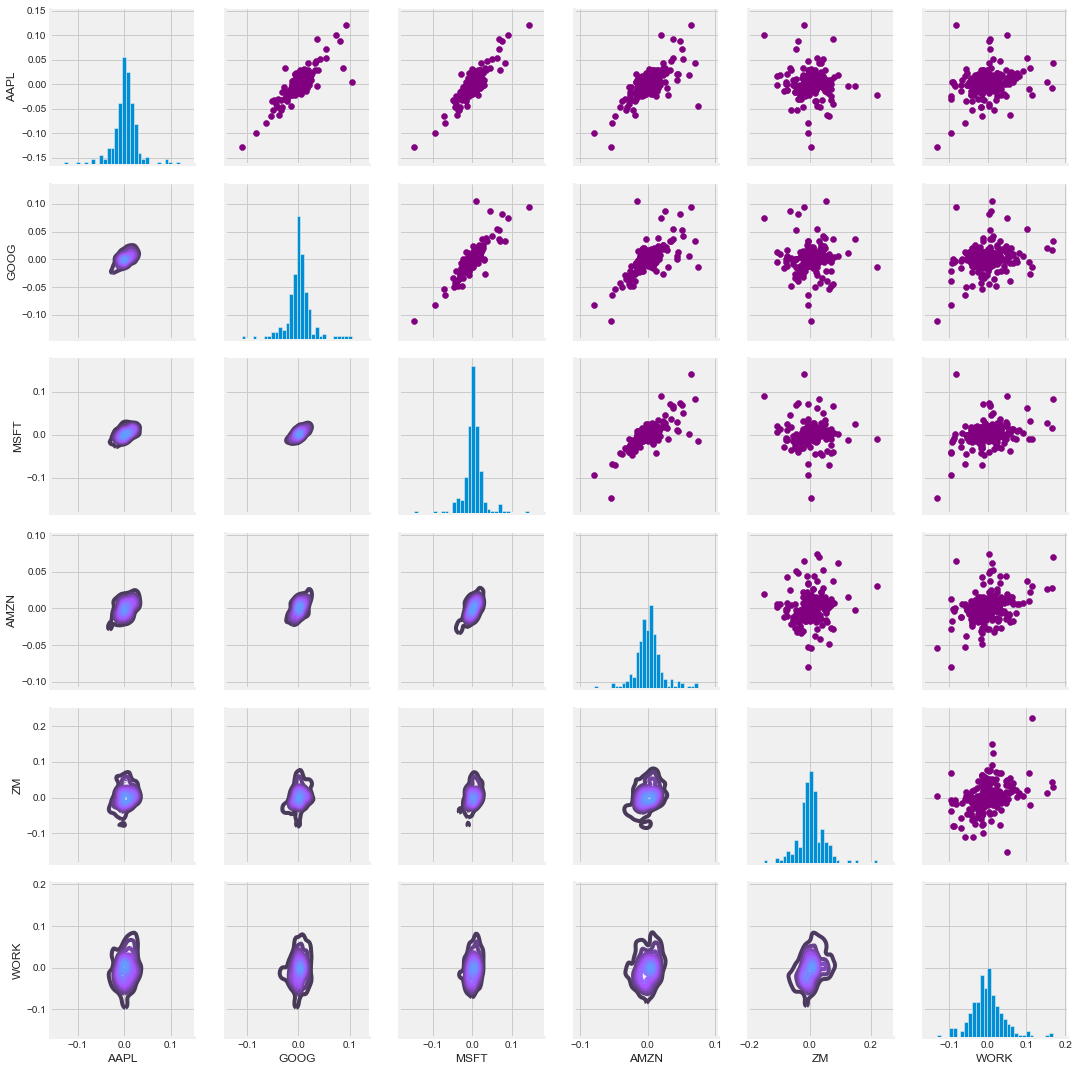

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30);

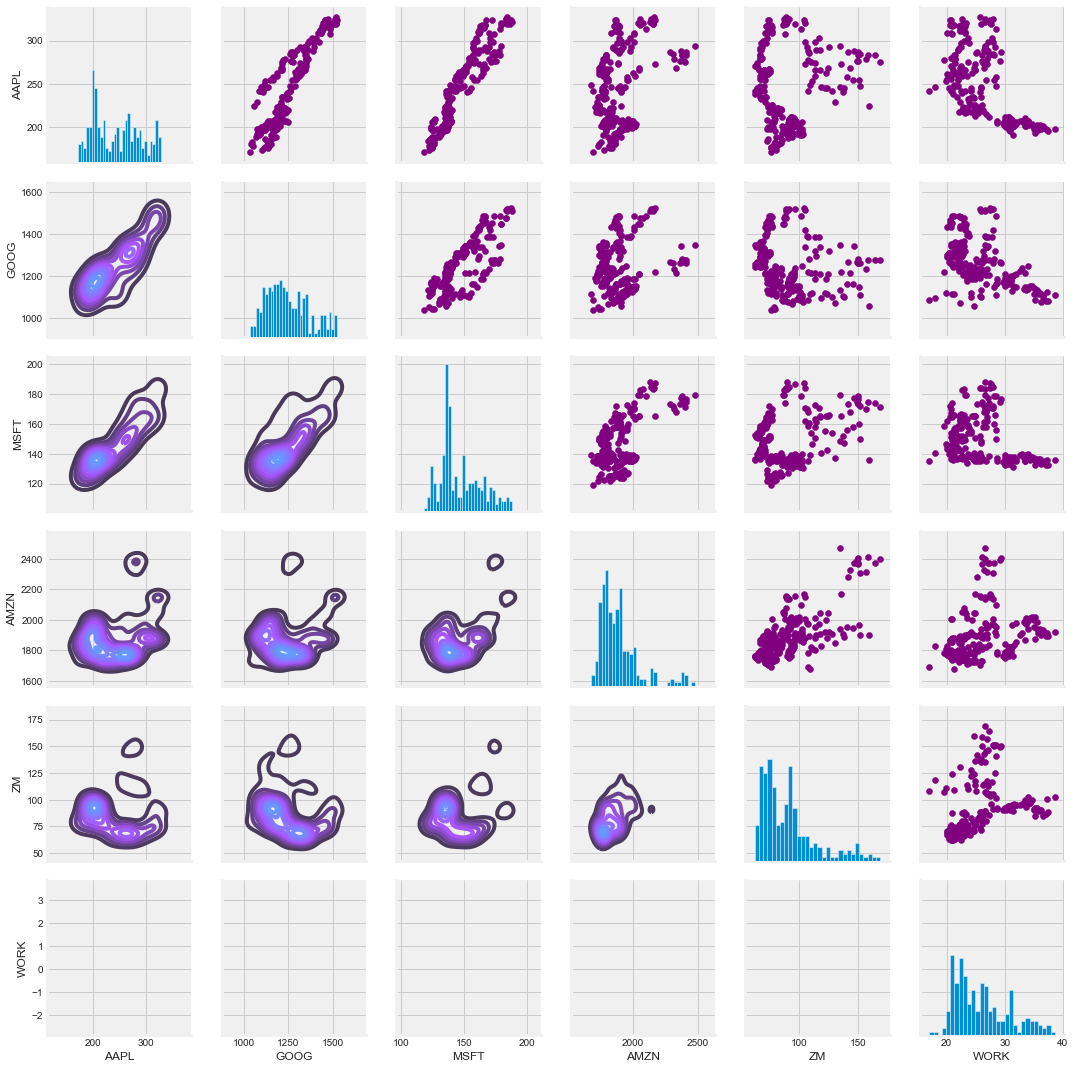

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30);

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

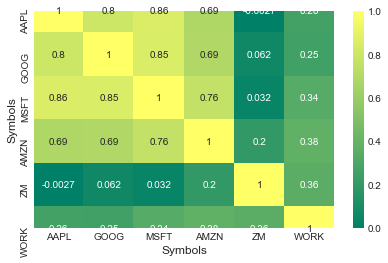

In [26]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer');

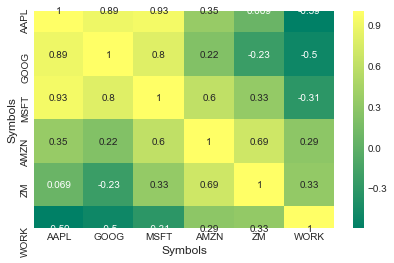

In [27]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer');

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Apple had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.And Zoom is the most special which have weak correlation with others.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

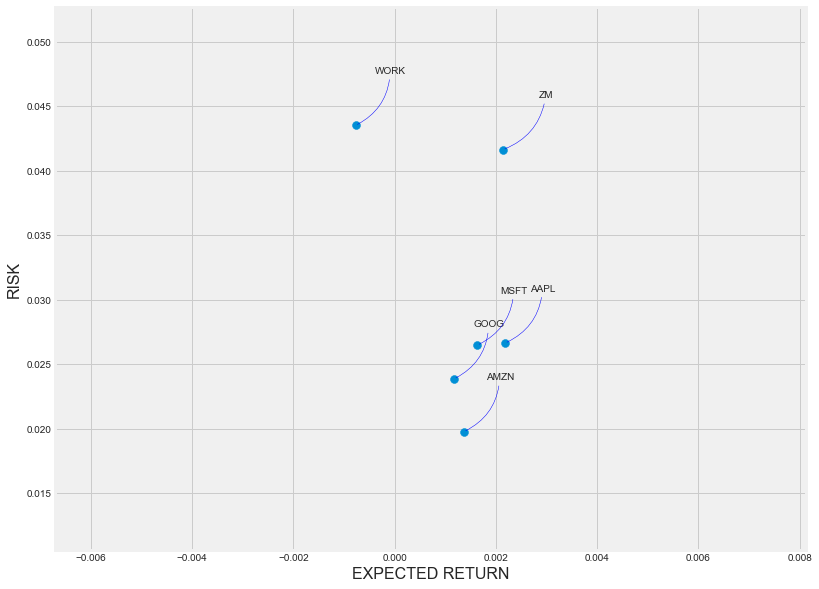

In [28]:
# Let's start by defining a new DataFrame as a cleaned version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('EXPECTED RETURN', fontsize = 16)
plt.ylabel('RISK', fontsize = 16)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of ZOOM:

In [29]:
#Get the stock quote
df = DataReader('ZM', data_source='yahoo', start='2012-01-01', end='2020-02-23')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-18,66.000000,60.320999,65.000000,62.000000,25764700,62.000000
2019-04-22,68.900002,59.939999,61.000000,65.699997,9949700,65.699997
2019-04-23,74.168999,65.550003,66.870003,69.000000,6786500,69.000000
2019-04-24,71.500000,63.160000,71.400002,63.200001,4973500,63.200001
2019-04-25,66.849998,62.599998,64.739998,65.000000,3863300,65.000000
...,...,...,...,...,...,...
2020-02-14,91.709999,89.809998,90.879997,90.949997,2295000,90.949997
2020-02-18,98.139999,92.400002,93.019997,96.389999,5608200,96.389999
2020-02-19,105.080002,99.750000,100.320000,103.930000,7793800,103.930000


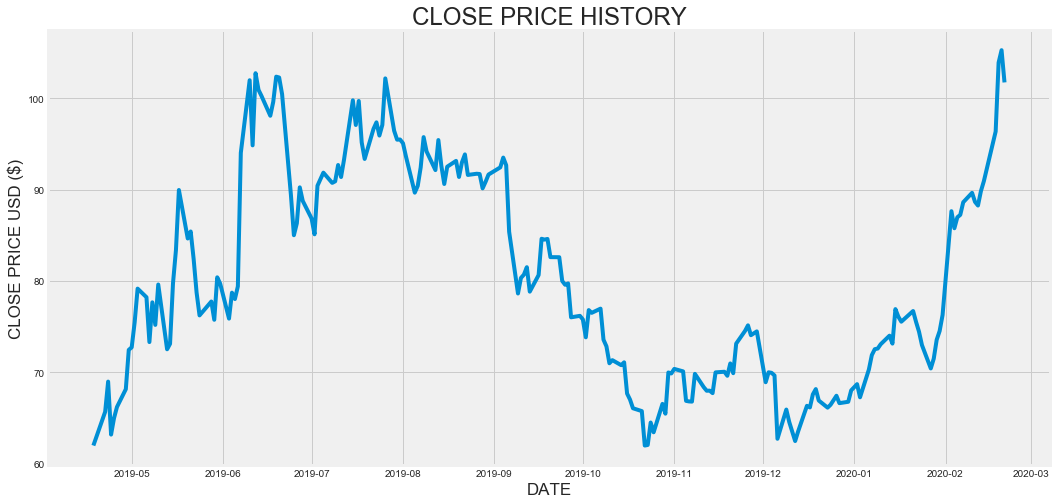

In [30]:
plt.figure(figsize=(16,8))
plt.title('CLOSE PRICE HISTORY', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('DATE', fontsize=17)
plt.ylabel('CLOSE PRICE USD ($)', fontsize=17)
plt.show()

In [31]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

171

In [32]:
dataset

array([[ 62.        ],
       [ 65.69999695],
       [ 69.        ],
       [ 63.20000076],
       [ 65.        ],
       [ 66.22000122],
       [ 68.16999817],
       [ 72.47000122],
       [ 72.76000214],
       [ 75.5       ],
       [ 79.18000031],
       [ 78.23999786],
       [ 73.33000183],
       [ 77.68000031],
       [ 75.20999908],
       [ 79.62999725],
       [ 72.54000092],
       [ 73.13999939],
       [ 79.76000214],
       [ 83.40000153],
       [ 89.98000336],
       [ 84.66999817],
       [ 85.44000244],
       [ 82.43000031],
       [ 78.76000214],
       [ 76.25      ],
       [ 77.76999664],
       [ 75.76999664],
       [ 80.41999817],
       [ 79.73000336],
       [ 75.90000153],
       [ 78.73999786],
       [ 78.04000092],
       [ 79.43000031],
       [ 94.05000305],
       [102.        ],
       [ 94.87000275],
       [102.76999664],
       [100.94999695],
       [100.29000092],
       [ 98.11000061],
       [ 99.63999939],
       [102.38999939],
       [102

In [33]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.08547001],
       [0.16170016],
       [0.02772004],
       [0.06930007],
       [0.09748212],
       [0.1425271 ],
       [0.24185726],
       [0.24855629],
       [0.31185031],
       [0.3968584 ],
       [0.37514432],
       [0.2617233 ],
       [0.36220836],
       [0.30515128],
       [0.40725334],
       [0.24347426],
       [0.25733424],
       [0.41025645],
       [0.49434052],
       [0.64633871],
       [0.52367747],
       [0.54146459],
       [0.47193347],
       [0.38715643],
       [0.32917532],
       [0.36428728],
       [0.31808723],
       [0.42550237],
       [0.40956348],
       [0.32109035],
       [0.38669433],
       [0.37052438],
       [0.4026334 ],
       [0.7403558 ],
       [0.9240009 ],
       [0.75929781],
       [0.94178784],
       [0.89974581],
       [0.88449989],
       [0.83414183],
       [0.86948484],
       [0.9330099 ],
       [0.93093098],
       [0.8886579 ],
       [0.6331717 ],
       [0.53199349],
       [0.562

In [34]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.08547001, 0.16170016, 0.02772004, 0.06930007,
       0.09748212, 0.1425271 , 0.24185726, 0.24855629, 0.31185031,
       0.3968584 , 0.37514432, 0.2617233 , 0.36220836, 0.30515128,
       0.40725334, 0.24347426, 0.25733424, 0.41025645, 0.49434052,
       0.64633871, 0.52367747, 0.54146459, 0.47193347, 0.38715643,
       0.32917532, 0.36428728, 0.31808723, 0.42550237, 0.40956348,
       0.32109035, 0.38669433, 0.37052438, 0.4026334 , 0.7403558 ,
       0.9240009 , 0.75929781, 0.94178784, 0.89974581, 0.88449989,
       0.83414183, 0.86948484, 0.9330099 , 0.93093098, 0.8886579 ,
       0.6331717 , 0.53199349, 0.56202359, 0.65303756, 0.61884963,
       0.57426658, 0.53430346, 0.65719557, 0.69022861, 0.6643567 ,
       0.66828366, 0.70963272, 0.6791407 , 0.72303078, 0.87318093])]
[0.810810758415377]

[array([0.        , 0.08547001, 0.16170016, 0.02772004, 0.06930007,
       0.09748212, 0.1425271 , 0.24185726, 0.24855629, 0.31185031,
       0.3968584 , 0.37514432, 0.2617

In [35]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(111, 60, 1)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

Using TensorFlow backend.


In [38]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
111/111 [==============================] - 6s 55ms/step - loss: 0.0119
Epoch 2/10
111/111 [==============================] - 6s 50ms/step - loss: 0.0086
Epoch 3/10
111/111 [==============================] - 5s 49ms/step - loss: 0.0083
Epoch 4/10
111/111 [==============================] - 5s 49ms/step - loss: 0.0079
Epoch 5/10
111/111 [==============================] - 5s 49ms/step - loss: 0.0067
Epoch 6/10
111/111 [==============================] - 5s 49ms/step - loss: 0.0076
Epoch 7/10
111/111 [==============================] - 6s 50ms/step - loss: 0.0068
Epoch 8/10
111/111 [==============================] - 6s 50ms/step - loss: 0.0055
Epoch 9/10
111/111 [==============================] - 6s 50ms/step - loss: 0.0046
Epoch 10/10
111/111 [==============================] - 6s 50ms/step - loss: 0.0049


In [40]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [41]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [42]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [43]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [44]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.675321821919265

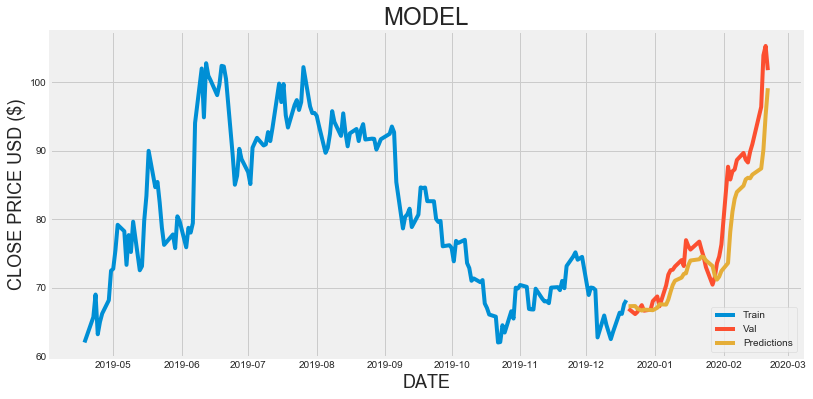

In [45]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,6))
plt.title('MODEL', fontsize=24)
plt.xlabel('DATE', fontsize=18)
plt.ylabel('CLOSE PRICE USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-12-20,66.930000,67.296516
2019-12-23,66.150002,67.317955
2019-12-24,66.459999,66.929512
2019-12-26,67.449997,66.661591
2019-12-27,66.639999,66.797554
2019-12-30,66.790001,66.742126
2019-12-31,68.040001,66.710022
2020-01-02,68.720001,67.062027
2020-01-03,67.279999,67.578918


### 7. CONCLUSION

#### * The big Four Tech Companies are Google, Apple, Microsoft and Amazon, they are good for long term investment. They have high expected return and low risk.
#### * Amazon is the world's largest online marketplace, it focuses on technological innovation and mass scale. This can benefit from pandemic time. It has high expected return and very low risk. This is a good stock.
#### * Zoom is a special stock which can benefit from this pandemic time. Zoom has a high expected return with the high risk. Investors should be careful to invest in Zoom.

#### * However, the Covid 19 crisis might change forever the behaviors of people from the whole world such as: life style, consuming habits, saving plan or social distance, ect. They all will affect to the economy globally.

<p><img src="images/habitschange.png" alt="Project Image Record" width="600px"></p>

#### * Investors need to learn how things have been adjusted during the pandemic time to make better decisions for the future.